In [2]:
from functions.utils_agents import *
import warnings

warnings.filterwarnings('ignore')

### On va exploiter la base sirene pour ajouter d'autres attributs à la table agents pour voir si ça va influencer sur la formation des clusters en faisant un comparaison entre les clusters qu'on a dans lla partie Questionnement  pour les agents

In [4]:
sirene = load_data(path='../donnees/siret_extended.csv')

In [5]:
sirene

,dateCreationEtablissement,siren,trancheEffectifsEtablissement,statutDiffusionEtablissement,dateCreationUniteLegale,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,siret,categorieEntreprise,nomenclatureActivitePrincipaleUniteLegale,categorieJuridiqueUniteLegale,trancheEffectifsUniteLegale,denominationUniteLegale,activitePrincipaleUniteLegale,statutDiffusionUniteLegale
0,2018-11-02,844505859.0,NaN,O,2018-11-02,94.99Z,NAFRev2,84450585900018,NaN,NAFRev2,9900.0,NaN,#APTIC,94.99Z,O
1,2015-03-01,330464504.0,12,O,1984-07-30,42.11Z,NAFRev2,33046450400050,GE,NAFRev2,5710.0,21,SOCIETE CORSE TRAVAUX,42.11Z,O
2,2005-11-08,429621311.0,32,O,2000-02-11,63.11Z,NAFRev2,42962131100027,ETI,NAFRev2,5599.0,32,1000MERCIS,63.11Z,O
3,2014-08-01,803521830.0,02,O,2014-08-01,71.11Z,NAFRev2,80352183000015,PME,NAFRev2,5499.0,02,1090 ARCHITECTES,71.11Z,O
4,2012-04-01,489598490.0,03,O,2006-04-07,59.11B,NAFRev2,48959849000030,PME,NAFRev2,5710.0,03,1616 PROD,59.11B,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227340,1996-12-19,999990005.0,NaN,O,1900-01-01,52.10A,NAFRev2,99999000500053,GE,NAFRev2,5599.0,31,STEF,68.20B,O
227341,1996-12-19,999990005.0,NaN,O,1900-01-01,52.10A,NAFRev2,99999000500186,GE,NAFRev2,5599.0,31,STEF,68.20B,O
227342,1997-01-01,999990005.0,NaN,O,1900-01-01,52.10A,NAFRev2,99999000500251,GE,NAFRev2,5599.0,31,STEF,68.20B,O
227343,2006-12-01,999990005.0,NaN,O,1900-01-01,52.10A,NAFRev2,99999000500483,GE,NAFRev2,5599.0,31,STEF,68.20B,O


In [6]:
sirene.dtypes


dateCreationEtablissement                       object
siren                                          float64
trancheEffectifsEtablissement                   object
statutDiffusionEtablissement                    object
dateCreationUniteLegale                         object
activitePrincipaleEtablissement                 object
nomenclatureActivitePrincipaleEtablissement     object
siret                                            int64
categorieEntreprise                             object
nomenclatureActivitePrincipaleUniteLegale       object
categorieJuridiqueUniteLegale                  float64
trancheEffectifsUniteLegale                     object
denominationUniteLegale                         object
activitePrincipaleUniteLegale                   object
statutDiffusionUniteLegale                      object
dtype: object

In [7]:
clustersWithoutSirene = load_data('../donnees/agents_cleaned_clusters.csv')

In [8]:
clustersWithoutSirene

,agentId,siret,name,city,country,department,buyers,suppliers,vc,cluster
0,0,8.445059e+13,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,0
1,1,1.000000e+13,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,0
2,2,3.304645e+13,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,0
3,3,1.000000e+13,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,0
4,4,1.000000e+13,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...
301091,301091,9.999900e+13,STEF,AVIGNON,FR,84,0.0,7.0,7,0
301092,301092,9.999900e+13,STEF,REICHSTETT,FR,67,0.0,1.0,7,0
301093,301093,9.999900e+13,STEF,LOUDEAC,FR,22,0.0,5.0,7,0
301094,301094,9.999900e+13,STEF,BEGLES,FR,33,0.0,3.0,7,0


In [9]:
clustersWithoutSirene = clustersWithoutSirene.drop('cluster', axis=1, errors='ignore')


In [10]:
clustersWithoutSirene

,agentId,siret,name,city,country,department,buyers,suppliers,vc
0,0,8.445059e+13,#APTIC,BORDEAUX,FR,33,0.0,8.0,1
1,1,1.000000e+13,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5
2,2,3.304645e+13,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2
3,3,1.000000e+13,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1
4,4,1.000000e+13,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...
301091,301091,9.999900e+13,STEF,AVIGNON,FR,84,0.0,7.0,7
301092,301092,9.999900e+13,STEF,REICHSTETT,FR,67,0.0,1.0,7
301093,301093,9.999900e+13,STEF,LOUDEAC,FR,22,0.0,5.0,7
301094,301094,9.999900e+13,STEF,BEGLES,FR,33,0.0,3.0,7


In [11]:
clusterSirene = clustersWithoutSirene.merge(sirene[['siret','trancheEffectifsEtablissement','categorieEntreprise']],how='left',on='siret')

In [12]:
clusterSirene

,agentId,siret,name,city,country,department,buyers,suppliers,vc,trancheEffectifsEtablissement,categorieEntreprise
0,0,8.445059e+13,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,NaN,NaN
1,1,1.000000e+13,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,41,ETI
2,2,3.304645e+13,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,12,GE
3,3,1.000000e+13,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,41,ETI
4,4,1.000000e+13,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,41,ETI
...,...,...,...,...,...,...,...,...,...,...,...
301091,301091,9.999900e+13,STEF,AVIGNON,FR,84,0.0,7.0,7,NaN,GE
301092,301092,9.999900e+13,STEF,REICHSTETT,FR,67,0.0,1.0,7,NaN,GE
301093,301093,9.999900e+13,STEF,LOUDEAC,FR,22,0.0,5.0,7,NaN,GE
301094,301094,9.999900e+13,STEF,BEGLES,FR,33,0.0,3.0,7,NaN,GE


In [13]:
tranchEffectif = clean_tranchEffectif_based_on_categorieEntreprise(clusterSirene)
tranchEffectif

,categorieEntreprise,trancheEffectifsEtablissement,cleaned_trancheEffectifsEtablissement
0,NaN,NaN,41
1,ETI,41,41
2,GE,12,12
3,ETI,41,41
4,ETI,41,41
...,...,...,...
301091,GE,NaN,12
301092,GE,NaN,12
301093,GE,NaN,12
301094,GE,NaN,12


In [14]:
clusterSirene= replace_original_with_cleaned(
    original = clusterSirene.copy(), 
    column = 'trancheEffectifsEtablissement',
    cleaned = tranchEffectif['cleaned_trancheEffectifsEtablissement'].values, 
    path = '../donnees/agents_sirene_cleaned.csv'
)

In [15]:
clusterSirene

,agentId,siret,name,city,country,department,buyers,suppliers,vc,trancheEffectifsEtablissement,categorieEntreprise
0,0,8.445059e+13,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,41,NaN
1,1,1.000000e+13,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,41,ETI
2,2,3.304645e+13,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,12,GE
3,3,1.000000e+13,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,41,ETI
4,4,1.000000e+13,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,41,ETI
...,...,...,...,...,...,...,...,...,...,...,...
301091,301091,9.999900e+13,STEF,AVIGNON,FR,84,0.0,7.0,7,12,GE
301092,301092,9.999900e+13,STEF,REICHSTETT,FR,67,0.0,1.0,7,12,GE
301093,301093,9.999900e+13,STEF,LOUDEAC,FR,22,0.0,5.0,7,12,GE
301094,301094,9.999900e+13,STEF,BEGLES,FR,33,0.0,3.0,7,12,GE


In [16]:
categorie = clean_categorieEntreprise_based_on_tranchEffectif(clusterSirene)
categorie

,trancheEffectifsEtablissement,categorieEntreprise,cleaned_categorieEntreprise
0,41,NaN,ETI
1,41,ETI,ETI
2,12,GE,GE
3,41,ETI,ETI
4,41,ETI,ETI
...,...,...,...
301091,12,GE,GE
301092,12,GE,GE
301093,12,GE,GE
301094,12,GE,GE


In [17]:
clusterSirene= replace_original_with_cleaned(
    original = clusterSirene.copy(), 
    column = 'categorieEntreprise',
    cleaned = categorie['cleaned_categorieEntreprise'].values, 
    path = '../donnees/agents_sirene_cleaned.csv'
)

In [19]:
clusters_sirene = load_data('../donnees/agents_sirene_cleaned.csv')

In [20]:
clusters_sirene

,agentId,siret,name,city,country,department,buyers,suppliers,vc,trancheEffectifsEtablissement,categorieEntreprise
0,0,8.445059e+13,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,41,ETI
1,1,1.000000e+13,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,41,ETI
2,2,3.304645e+13,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,12,GE
3,3,1.000000e+13,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,41,ETI
4,4,1.000000e+13,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,41,ETI
...,...,...,...,...,...,...,...,...,...,...,...
301091,301091,9.999900e+13,STEF,AVIGNON,FR,84,0.0,7.0,7,12,GE
301092,301092,9.999900e+13,STEF,REICHSTETT,FR,67,0.0,1.0,7,12,GE
301093,301093,9.999900e+13,STEF,LOUDEAC,FR,22,0.0,5.0,7,12,GE
301094,301094,9.999900e+13,STEF,BEGLES,FR,33,0.0,3.0,7,12,GE


In [21]:
numeric_columns = get_dtypes_columns(clusters_sirene, dtypes=['number'], to_remove=['agentId'])
numeric_columns

['siret', 'buyers', 'suppliers', 'vc']

In [22]:
numeric_columns.pop(0)

'siret'

In [23]:
numeric_columns

['buyers', 'suppliers', 'vc']

In [24]:
categorical_columns = get_dtypes_columns(clusters_sirene, dtypes=['object'], to_remove=['name'])
categorical_columns

['city',
 'country',
 'department',
 'trancheEffectifsEtablissement',
 'categorieEntreprise']

100%|██████████| 19/19 [06:52<00:00, 21.72s/it]


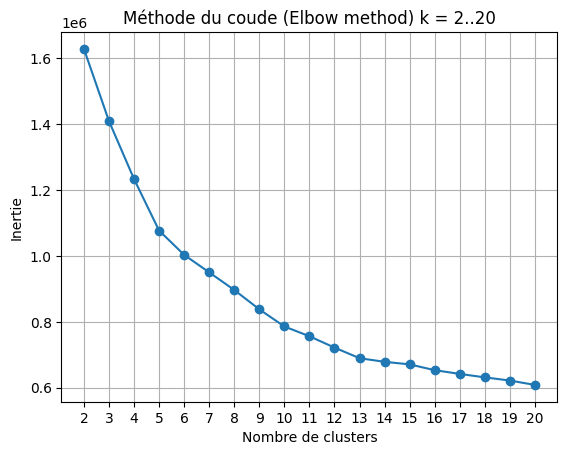

In [25]:
best_k = run_multiple_kmeans(
    data=clusters_sirene, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    end = 20,
    saveas = '../images/05_extension_agents_01.png'
)

In [26]:
best_k

5

In [27]:
clusters_1, inertia_1 = do_kmeans(
    data=clusterSirene, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    k=best_k
)

In [28]:
save_data(clusters_1,path='../donnees/agents_sirene_clusters.csv')

In [29]:
clusters_1 = load_data('../donnees/agents_sirene_clusters.csv')

In [30]:
clusters_1

,agentId,siret,name,city,country,department,buyers,suppliers,vc,trancheEffectifsEtablissement,categorieEntreprise,cluster
0,0,8.445059e+13,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,41,ETI,3
1,1,1.000000e+13,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,41,ETI,3
2,2,3.304645e+13,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,12,GE,0
3,3,1.000000e+13,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,41,ETI,3
4,4,1.000000e+13,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,41,ETI,3
...,...,...,...,...,...,...,...,...,...,...,...,...
301091,301091,9.999900e+13,STEF,AVIGNON,FR,84,0.0,7.0,7,12,GE,0
301092,301092,9.999900e+13,STEF,REICHSTETT,FR,67,0.0,1.0,7,12,GE,0
301093,301093,9.999900e+13,STEF,LOUDEAC,FR,22,0.0,5.0,7,12,GE,0
301094,301094,9.999900e+13,STEF,BEGLES,FR,33,0.0,3.0,7,12,GE,0


In [31]:
cluster_1_gb = get_gb_count(clusters_1, by_col='cluster')
cluster_1_gb

,cluster,count,proportion
0,0,156537,51.989067
1,3,142546,47.342376
2,2,1727,0.573571
3,1,285,0.094654
4,4,1,0.000332


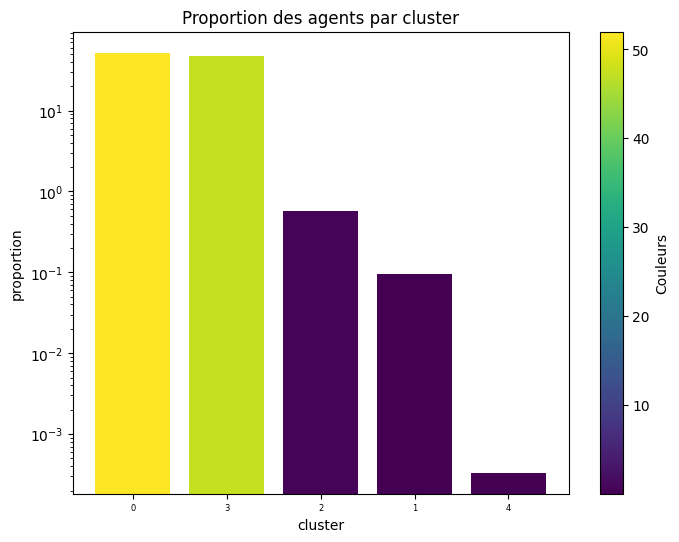

In [32]:
plot_proportion(
    data=cluster_1_gb, 
    xcol='cluster', 
    ycol='proportion',
    title='Proportion des agents par cluster',
    xtitle='cluster',
    ytitle='proportion',
    logy=True
)

In [33]:
get_moyenne_mode(
    data=clusters_1,
    numeric_features=numeric_columns,
    categorical_features=categorical_columns,
    k_best=best_k
)

,cluster,city,country,department,trancheEffectifsEtablissement,categorieEntreprise,buyers,suppliers,vc
0,0,PARIS,FR,75,11,PME,2.180647,5.027789,4.248459
1,1,PARIS,FR,75,41,ETI,1793.238596,2.821053,11.494737
2,2,PARIS,FR,75,12,GE,11.499131,5.729010,340.540822
3,3,PARIS,FR,75,41,ETI,4.386991,3.945814,3.668633
4,4,NIORT,FR,79,41,GE,0.000000,11342.000000,8.000000


In [34]:
gb_pays = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'country_group'],
    column='country',
    threshold = 500,
)

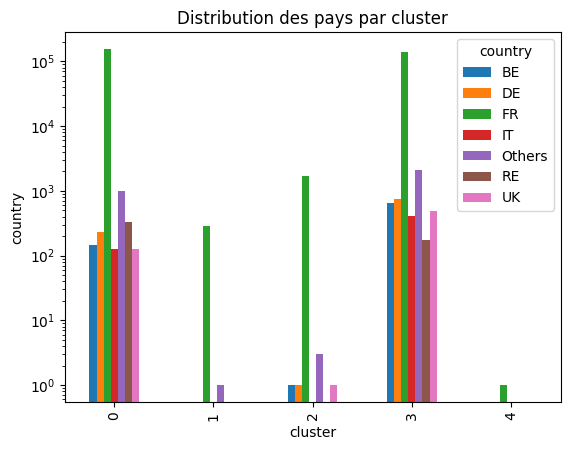

In [40]:
plot_categorial_categorical(
    data=gb_pays,
    title="Distribution des pays par cluster",
    xlabel="cluster",
    ylabel="country",
    logy=True,
        saveas = '../images/05_extension_agents_01_clusterbycountry.png'

)

In [36]:
gb_city = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'city_group'],
    column='city',
    threshold= 1800
)

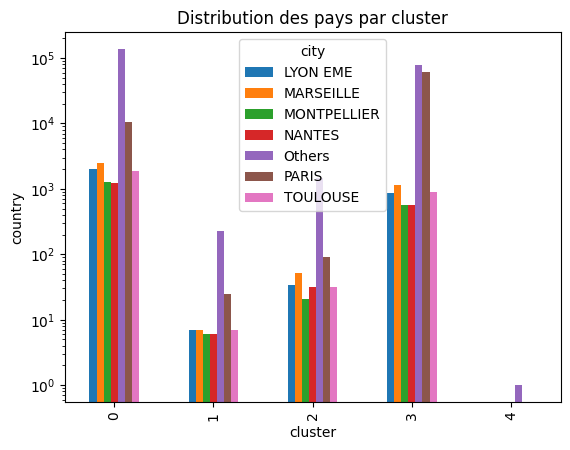

In [37]:
plot_categorial_categorical(
    data=gb_city,
    title="Distribution des pays par cluster",
    xlabel="cluster",
    ylabel="country",
    logy=True,
        saveas = '../images/05_extension_agents_01_clusterbycity.png'

)

In [38]:
cluster_1_corr_cat, cluster_1_corr_num = get_all_corr_cat(
    data = clusters_1, 
    col = 'cluster', 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns
)

(5, 22036) cluster city
(5, 105) cluster country
(5, 109) cluster department
(5, 19) cluster trancheEffectifsEtablissement
(5, 3) cluster categorieEntreprise


In [39]:
cluster_1_corr_cat.sort_values(by='cluster', ascending=False)

,cluster
categorieEntreprise,0.702646
trancheEffectifsEtablissement,0.494081
city,0.298533
department,0.237181
country,0.045075


In [41]:
cluster_1_corr_num

,cluster
buyers,0.0
suppliers,0.0
vc,0.0
